### Loading necessary libraries

In [170]:
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

from sklearn.ensemble import IsolationForest











#### Loading dataset

In [171]:
insurance_data = pd.read_csv('insurance_data_sample.csv')
insurance_data.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Amount_paid_for_insurance,Claim amount,City
0,C_CND_000001,01/02/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃ‚Â Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,1665,0.0,Riga
1,C_CND_000002,01/02/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃ‚Â Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,1332,1900.0,Liepaja
2,C_CND_000003,01/02/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,1897,0.0,Riga
3,C_CND_000004,01/02/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,1176,0.0,Jelgava
4,C_CND_000005,01/02/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÃ‚Â Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,1323,2450.0,Liepaja


In [172]:
insurance_data.shape

(23906, 18)

#### Cleaning dataset

In [173]:
# Checking data types
insurance_data.dtypes

Car_id                        object
Date                          object
Customer Name                 object
Gender                        object
Annual Income                  int64
Dealer_Name                   object
Company                       object
Model                         object
Engine                        object
Transmission                  object
Color                         object
Price ($)                      int64
Dealer_No                     object
Body Style                    object
Phone                          int64
Amount_paid_for_insurance      int64
Claim amount                 float64
City                          object
dtype: object

In [174]:
# Checking for missing values
insurance_data.isnull().sum()


Car_id                       0
Date                         0
Customer Name                1
Gender                       0
Annual Income                0
Dealer_Name                  0
Company                      0
Model                        0
Engine                       0
Transmission                 0
Color                        0
Price ($)                    0
Dealer_No                    0
Body Style                   0
Phone                        0
Amount_paid_for_insurance    0
Claim amount                 0
City                         0
dtype: int64

In [175]:
# Filling missing value in Customer Name column with Mode
mode_value = insurance_data['Customer Name'].mode()[0]
insurance_data['Customer Name'].fillna(mode_value, inplace=True)
insurance_data.isnull().sum()


Car_id                       0
Date                         0
Customer Name                0
Gender                       0
Annual Income                0
Dealer_Name                  0
Company                      0
Model                        0
Engine                       0
Transmission                 0
Color                        0
Price ($)                    0
Dealer_No                    0
Body Style                   0
Phone                        0
Amount_paid_for_insurance    0
Claim amount                 0
City                         0
dtype: int64

In [176]:
insurance_data.isna().sum()

Car_id                       0
Date                         0
Customer Name                0
Gender                       0
Annual Income                0
Dealer_Name                  0
Company                      0
Model                        0
Engine                       0
Transmission                 0
Color                        0
Price ($)                    0
Dealer_No                    0
Body Style                   0
Phone                        0
Amount_paid_for_insurance    0
Claim amount                 0
City                         0
dtype: int64

In [177]:
# checking for duplicate values
insurance_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23901    False
23902    False
23903    False
23904    False
23905    False
Length: 23906, dtype: bool

In [178]:
print(insurance_data['Transmission'].unique())
print(insurance_data['Body Style'].unique())
print(insurance_data['Model'].unique())
print(insurance_data['Engine'].unique())

['Auto' 'Manual']
['SUV' 'Passenger' 'Hatchback' 'Hardtop' 'Sedan']
['Expedition' 'Durango' 'Eldorado' 'Celica' 'TL' 'Diamante' 'Corolla'
 'Galant' 'Malibu' 'Escort' 'RL' 'Pathfinder' 'Grand Marquis' '323i'
 'Sebring Coupe' 'Forester' 'Accent' 'Land Cruiser' 'Accord' '4Runner'
 'I30' 'A4' 'Carrera Cabrio' 'Jetta' 'Viper' 'Regal' 'LHS' 'LW' '3000GT'
 'SLK230' 'Civic' 'S-Type' 'S40' 'Mountaineer' 'Park Avenue'
 'Montero Sport' 'Sentra' 'S80' 'Lumina' 'Bonneville' 'C-Class' 'Altima'
 'DeVille' 'Stratus' 'Cougar' 'SW' 'C70' 'SLK' 'Tacoma' 'M-Class' 'A6'
 'Intrepid' 'Sienna' 'Eclipse' 'Contour' 'Town car' 'Focus' 'Mustang'
 'Cutlass' 'Corvette' 'Impala' 'Cabrio' 'Dakota' '300M' '328i' 'Bravada'
 'Maxima' 'Ram Pickup' 'Concorde' 'V70' 'Quest' 'ES300' 'SL-Class'
 'Explorer' 'Prizm' 'Camaro' 'Outback' 'Taurus' 'Cavalier' 'GS400'
 'Monte Carlo' 'Sonata' 'Sable' 'Metro' 'Voyager' 'Cirrus' 'Avenger'
 'Odyssey' 'Intrigue' 'Silhouette' '05-Sep' '528i' 'LS400' 'Aurora'
 'Breeze' 'Beetle' 'Elantra' '

In [179]:
# Renaming Double A Overhead Camshaft
insurance_data['Engine'] = insurance_data['Engine'].replace({'DoubleÃ‚Â\xa0Overhead Camshaft': 'Double Overhead Camshaft'})
print(insurance_data['Engine'].unique())


['Double Overhead Camshaft' 'Overhead Camshaft']


In [180]:
#Removing values that are dates in the Model column
insurance_data = insurance_data[~insurance_data['Model'].isin(['05-Sep', '03-Sep'])]
print(insurance_data['Model'].unique())


['Expedition' 'Durango' 'Eldorado' 'Celica' 'TL' 'Diamante' 'Corolla'
 'Galant' 'Malibu' 'Escort' 'RL' 'Pathfinder' 'Grand Marquis' '323i'
 'Sebring Coupe' 'Forester' 'Accent' 'Land Cruiser' 'Accord' '4Runner'
 'I30' 'A4' 'Carrera Cabrio' 'Jetta' 'Viper' 'Regal' 'LHS' 'LW' '3000GT'
 'SLK230' 'Civic' 'S-Type' 'S40' 'Mountaineer' 'Park Avenue'
 'Montero Sport' 'Sentra' 'S80' 'Lumina' 'Bonneville' 'C-Class' 'Altima'
 'DeVille' 'Stratus' 'Cougar' 'SW' 'C70' 'SLK' 'Tacoma' 'M-Class' 'A6'
 'Intrepid' 'Sienna' 'Eclipse' 'Contour' 'Town car' 'Focus' 'Mustang'
 'Cutlass' 'Corvette' 'Impala' 'Cabrio' 'Dakota' '300M' '328i' 'Bravada'
 'Maxima' 'Ram Pickup' 'Concorde' 'V70' 'Quest' 'ES300' 'SL-Class'
 'Explorer' 'Prizm' 'Camaro' 'Outback' 'Taurus' 'Cavalier' 'GS400'
 'Monte Carlo' 'Sonata' 'Sable' 'Metro' 'Voyager' 'Cirrus' 'Avenger'
 'Odyssey' 'Intrigue' 'Silhouette' '528i' 'LS400' 'Aurora' 'Breeze'
 'Beetle' 'Elantra' 'Continental' 'RAV4' 'Villager' 'S70' 'LS' 'Ram Van'
 'S-Class' 'E-Class' 'Gra

### Claim Frequency

In [181]:
# Converting Date column to datetime format
insurance_data['Date'] = pd.to_datetime(insurance_data['Date'],format ='%m/%d/%Y')

date_datatype= insurance_data['Date'].dtype
print(date_datatype)


datetime64[ns]


In [182]:

# Extracting month from 'Date' column
insurance_data['Month'] = insurance_data['Date'].dt.strftime('%B')

# Getting unique months
unique_months = insurance_data['Month'].unique()

print("Unique months:", unique_months)

#re-ordering month column to be afte date column
insurance_data.reindex(columns=['Date', 'Month'] + [col for col in insurance_data.columns if col != 'Date' and col != 'Month'])



Unique months: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


,Date,Month,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Amount_paid_for_insurance,Claim amount,City
0,2022-01-02,January,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,1665,0.0,Riga
1,2022-01-02,January,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,1332,1900.0,Liepaja
2,2022-01-02,January,C_CND_000003,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,1897,0.0,Riga
3,2022-01-02,January,C_CND_000004,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,1176,0.0,Jelgava
4,2022-01-02,January,C_CND_000005,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,1323,2450.0,Liepaja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,2023-12-31,December,C_CND_023902,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,692,1200.0,Tukums
23902,2023-12-31,December,C_CND_023903,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Double Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,1072,0.0,Liepaja
23903,2023-12-31,December,C_CND_023904,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,1061,0.0,Liepaja
23904,2023-12-31,December,C_CND_023905,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,Double Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,1922,3100.0,Tukums


In [183]:
# Setting date column as index
insurance_data.set_index('Date',inplace = True)


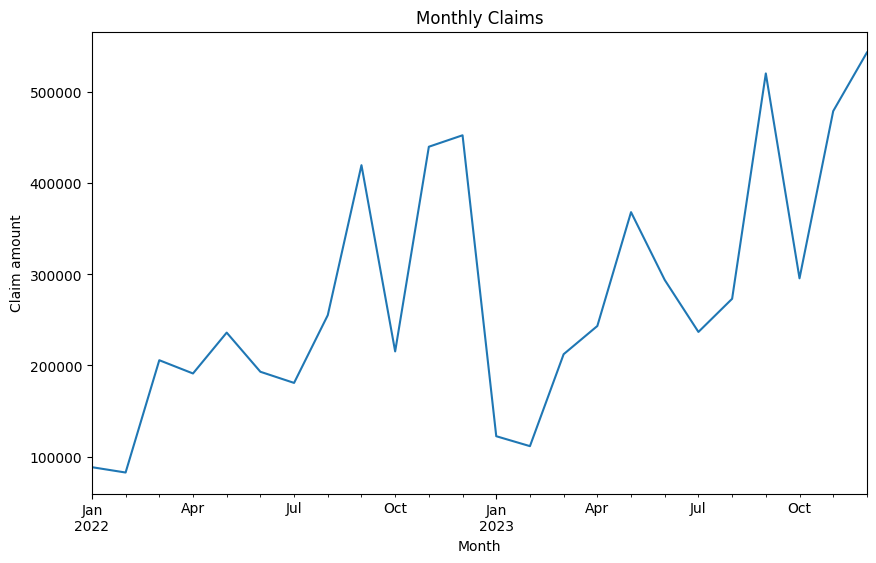

In [184]:
#Calculating monthly claims
monthly_claims = insurance_data['Claim amount'].resample('M').sum()

# Visualizing monthly claims data
plt.figure(figsize=(10, 6))
monthly_claims.plot()
plt.title('Monthly Claims')
plt.xlabel('Month')
plt.ylabel('Claim amount')
plt.show()




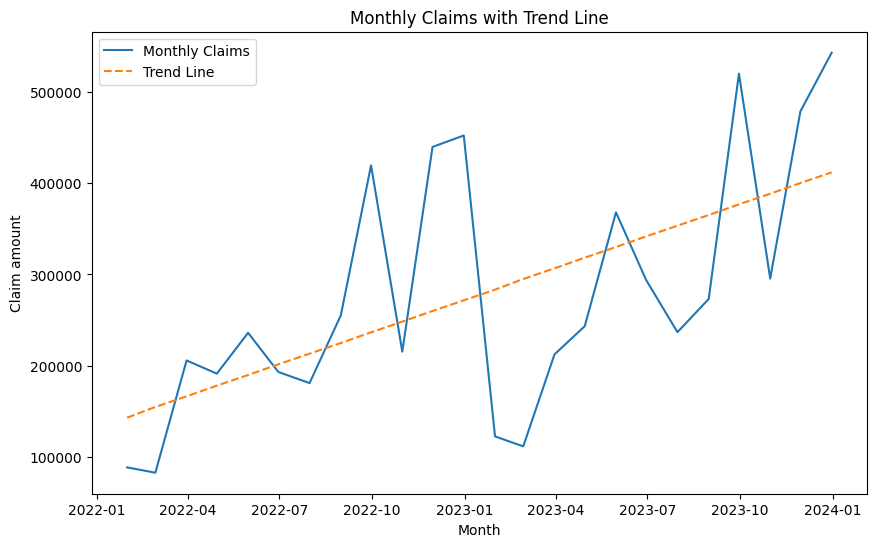

In [185]:
# Trend Analysis
# Fitting linear regression to the monthly claims data
X = sm.add_constant(range(len(monthly_claims)))
model = sm.OLS(monthly_claims.values, X)
results = model.fit()
slope = results.params[1]

plt.figure(figsize=(10, 6))
plt.plot(monthly_claims.index, monthly_claims.values, label='Monthly Claims')
plt.plot(monthly_claims.index, results.predict(X), label='Trend Line', linestyle='--')
plt.title('Monthly Claims with Trend Line')
plt.xlabel('Month')
plt.ylabel('Claim amount')
plt.legend()
plt.show()


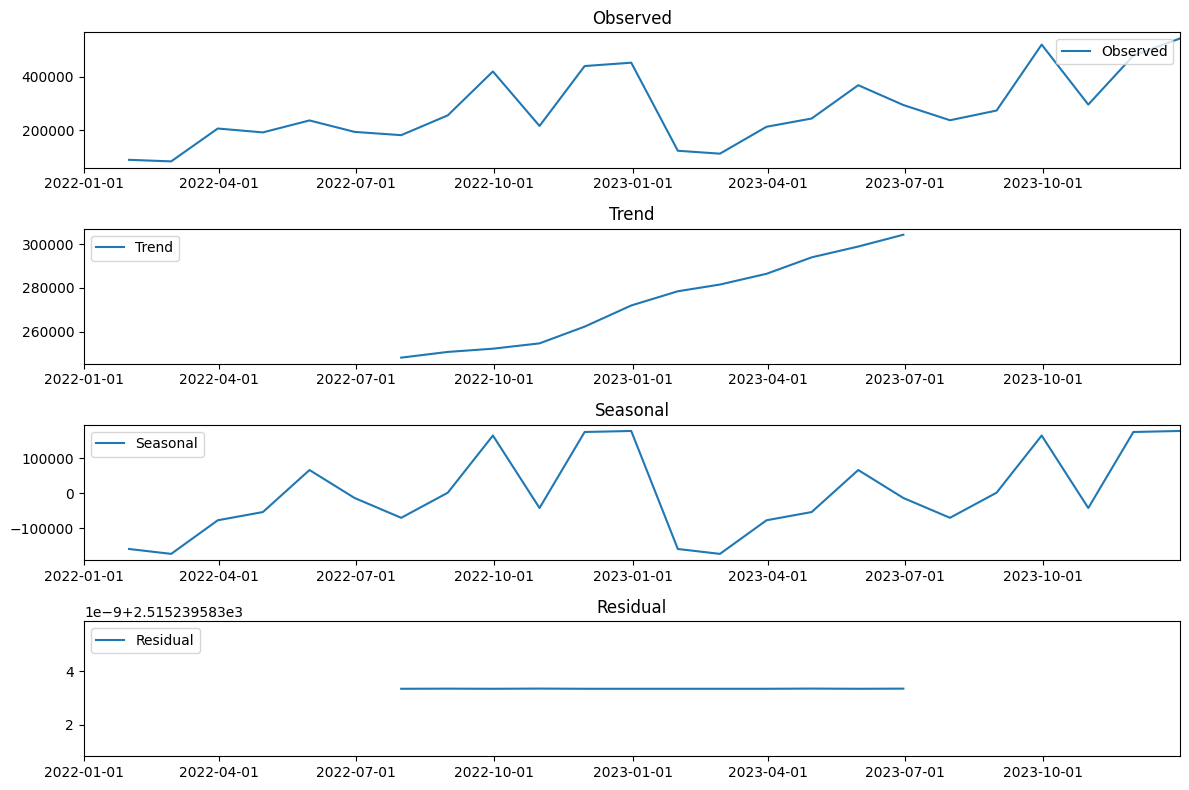

In [186]:
# Seasonal Patterns
# Decomposing the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(monthly_claims, model='additive')

# Visualizing decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(monthly_claims.index, decomposition.observed, label='Observed')
plt.legend(loc='upper right')
plt.title('Observed')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-12-31'))  

plt.subplot(412)
plt.plot(monthly_claims.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-12-31'))  

plt.subplot(413)
plt.plot(monthly_claims.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-12-31'))  

plt.subplot(414)
plt.plot(monthly_claims.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2023-12-31'))  

plt.tight_layout()
plt.show()

#### High Risk Groups

In [187]:
max_income = insurance_data['Annual Income'].max()
min_income = insurance_data['Annual Income'].min()

print(max_income, min_income)

11200000 10080


In [188]:
# Creating Claim Made column to indicate if a claim was made (1 if claim amount > 0, else 0)
insurance_data['Claim Made'] = insurance_data['Claim amount'] > 0

# Defining income bins
income_bins = [0, 20000, 50000, 100000, 200000, 500000, 1000000, insurance_data['Annual Income'].max()]
income_labels = ['<20k', '20k-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '>1M']

# Creating an income category column
insurance_data['Income Category'] = pd.cut(insurance_data['Annual Income'], bins=income_bins, labels=income_labels)

print(insurance_data[['Gender', 'Annual Income', 'Income Category', 'Claim amount', 'Claim Made']].head())


           Gender  Annual Income Income Category  Claim amount  Claim Made
Date                                                                      
2022-01-02   Male          13500            <20k           0.0       False
2022-01-02   Male        1480000             >1M        1900.0        True
2022-01-02   Male        1035000             >1M           0.0       False
2022-01-02   Male          13500            <20k           0.0       False
2022-01-02   Male        1465000             >1M        2450.0        True


In [189]:
#gender grouping

gender_group = insurance_data.groupby(['Gender', 'Income Category'])

# Calculating the total number of claims, the total claim amount, and the average claim amount
claims_summary = gender_group.agg(
    total_claims=('Claim Made', 'sum'),
    total_claim_amount=('Claim amount', 'sum'),
    avg_claim_amount=('Claim amount', 'mean')
).reset_index()

claims_summary

,Gender,Income Category,total_claims,total_claim_amount,avg_claim_amount
0,Female,<20k,103,268600.0,238.755556
1,Female,20k-50k,0,0.0,NaN
2,Female,50k-100k,0,0.0,NaN
3,Female,100k-200k,0,0.0,0.000000
4,Female,200k-500k,55,158806.0,271.000000
5,Female,500k-1M,217,627848.0,303.308213
6,Female,>1M,127,379143.0,296.669014
7,Male,<20k,405,1103600.0,268.515815
8,Male,20k-50k,0,0.0,0.000000
9,Male,50k-100k,0,0.0,0.000000


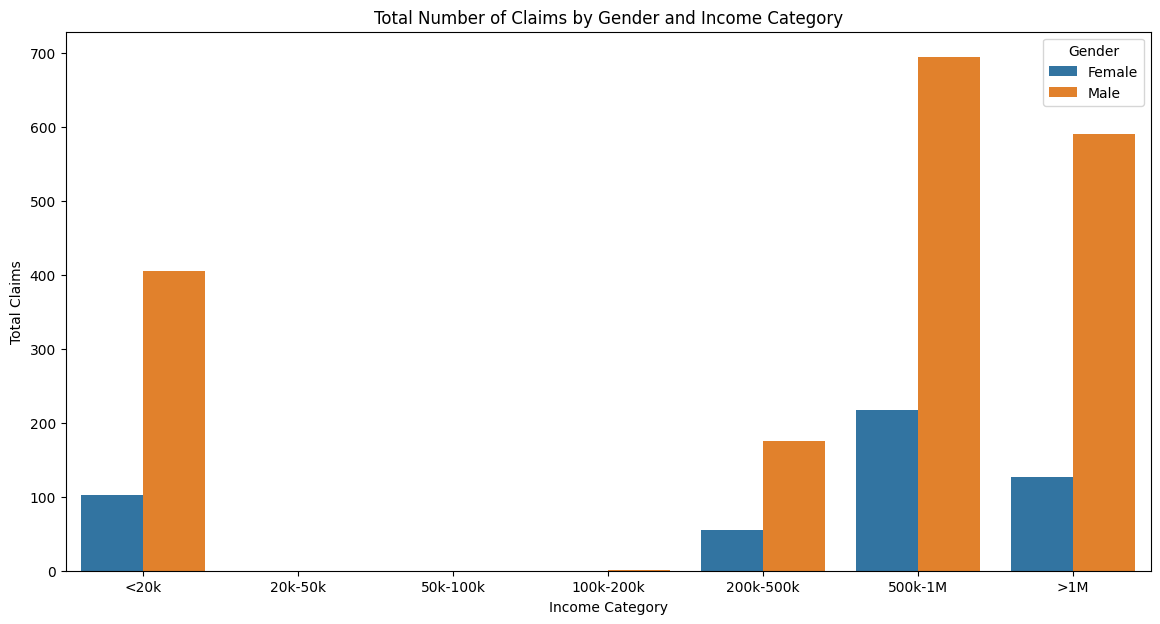

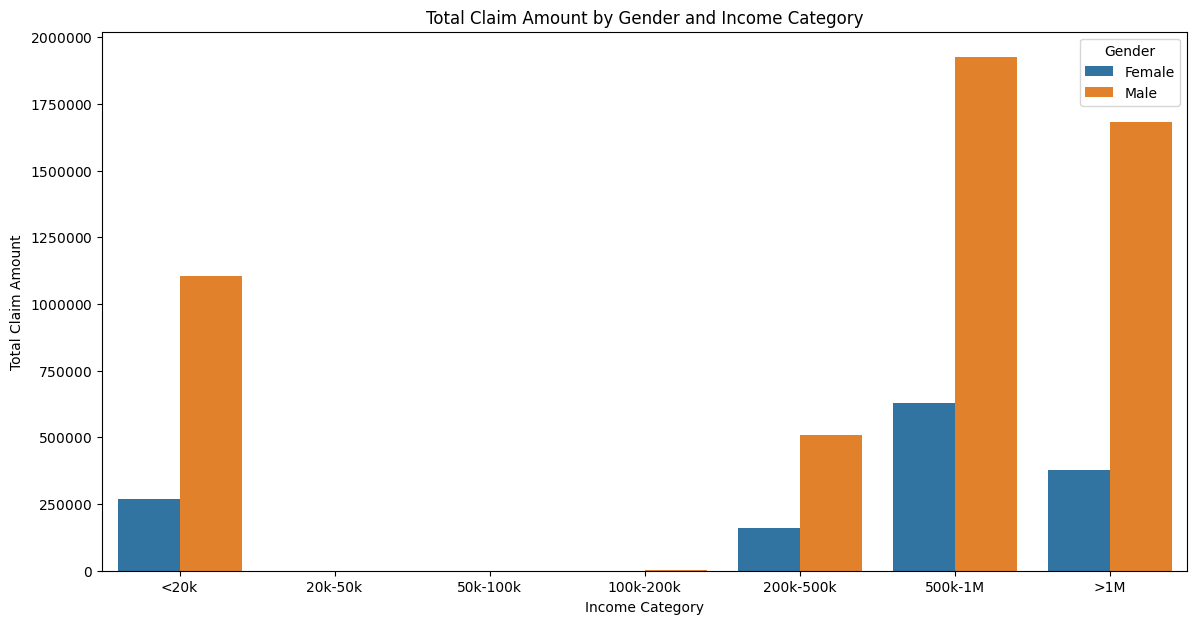

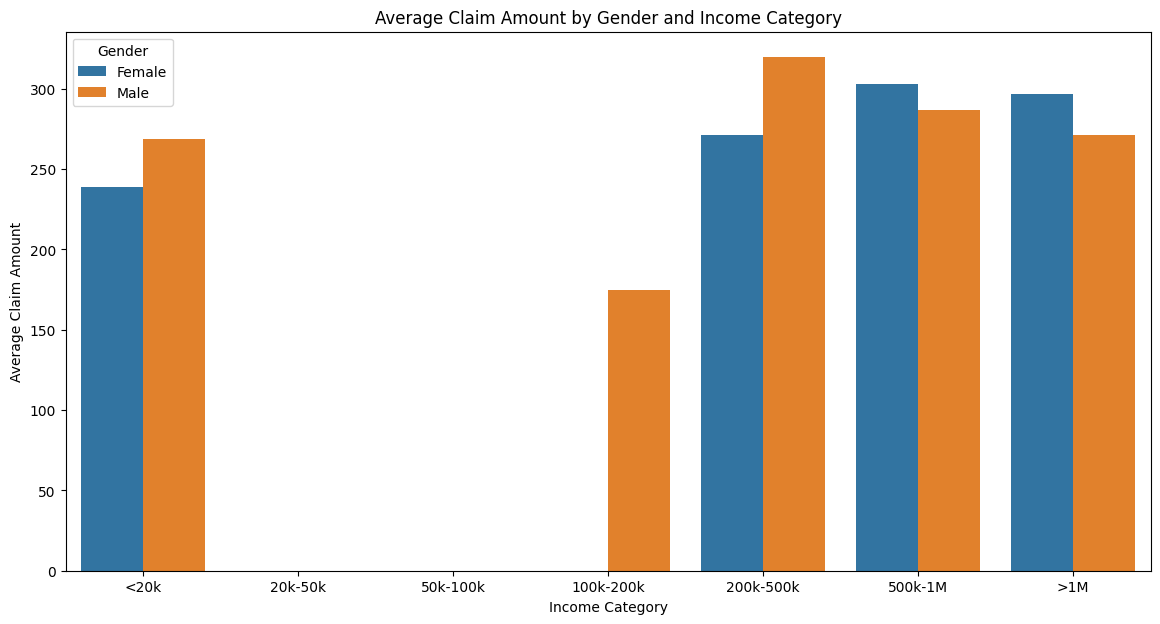

In [190]:


# The total number of claims by gender and income category
plt.figure(figsize=(14, 7))
sns.barplot(data=claims_summary, x='Income Category', y='total_claims', hue='Gender')
plt.title('Total Number of Claims by Gender and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Total Claims')
plt.legend(title='Gender')
plt.show()

# The total claim amount by gender and income category
plt.figure(figsize=(14, 7))
sns.barplot(data=claims_summary, x='Income Category', y='total_claim_amount', hue='Gender')

# disabling scientific notation on y axis
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True)) 
ax.yaxis.get_major_formatter().set_scientific(False)  
ax.yaxis.get_major_formatter().set_useOffset(False) 

plt.title('Total Claim Amount by Gender and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Total Claim Amount')
plt.legend(title='Gender')
plt.show()


# The average claim amount by gender and income category
plt.figure(figsize=(14, 7))
sns.barplot(data=claims_summary, x='Income Category', y='avg_claim_amount', hue='Gender')
plt.title('Average Claim Amount by Gender and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Claim Amount')
plt.legend(title='Gender')
plt.show()


#### Predicting Claims based on Gender and Annual Income (Multiple Linear Regression and Random Forest)

#### Predicting using Multiple Linear Regression

In [191]:
x = insurance_data[['Annual Income','Gender']]
y = insurance_data['Claim amount']

x = pd.get_dummies(x, columns=['Gender'], drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(predictions)



comparison = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
print(comparison)


# Evaluating the model
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Claim Amounts')
plt.show()

#### Predicting using Random Forest

In [192]:
# Encoding Gender: Male as 0, Female as 1
insurance_data['Gender'] = insurance_data['Gender'].map({'Male': 0, 'Female': 1})

X = insurance_data[['Annual Income', 'Gender']]
y = insurance_data['Claim amount']

train_size = int(0.7 * len(insurance_data))
test_size = len(insurance_data) - train_size

train_data = insurance_data[:train_size]
test_data = insurance_data[train_size:]


X_train = train_data[['Annual Income', 'Gender']]
y_train = train_data['Claim amount']
X_test = test_data[['Annual Income', 'Gender']]
y_test = test_data['Claim amount']

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Creating a DataFrame to display actual and predicted values side by side
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

            Actual   Predicted
Date                          
2023-08-15     0.0  253.723351
2023-08-15  2100.0  256.641628
2023-08-15     0.0  299.188143
2023-08-15     0.0  295.706566
2023-08-15     0.0  273.701710
...            ...         ...
2023-12-31  1200.0  265.683328
2023-12-31     0.0  311.699243
2023-12-31     0.0  272.687577
2023-12-31  3100.0  265.683328
2023-12-31     0.0  256.641628

[7109 rows x 2 columns]
Mean Absolute Error (MAE): 506.5164974182717
Root Mean Squared Error (RMSE): 974.3683409926838


#### Finding out dealer and car models associated with higher claim amounts

Top Dealers Associated with Higher Claim Amounts:
Dealer_Name
Pars Auto Sales         379.009585
Classic Chevy           330.356564
Saab-Belle Dodge        300.948387
Suburban Ford           300.052803
Star Enterprises Inc    298.738884
Name: Claim amount, dtype: float64

Top Car Models Associated with Higher Claim Amounts:
Model
Catera     875.666667
V70        667.073171
Aurora     604.074074
Prowler    597.565789
Tacoma     580.391061
Name: Claim amount, dtype: float64


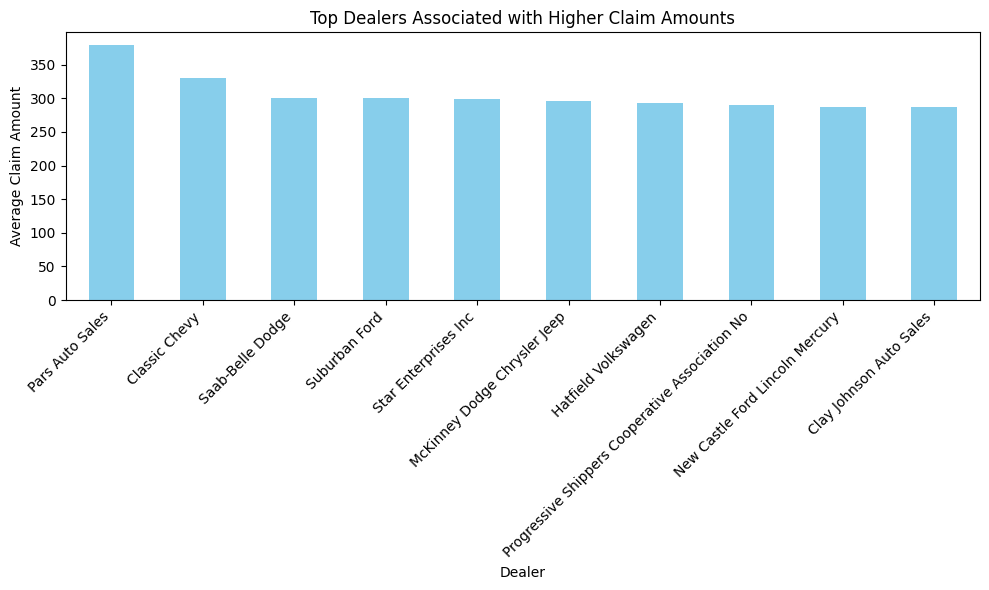

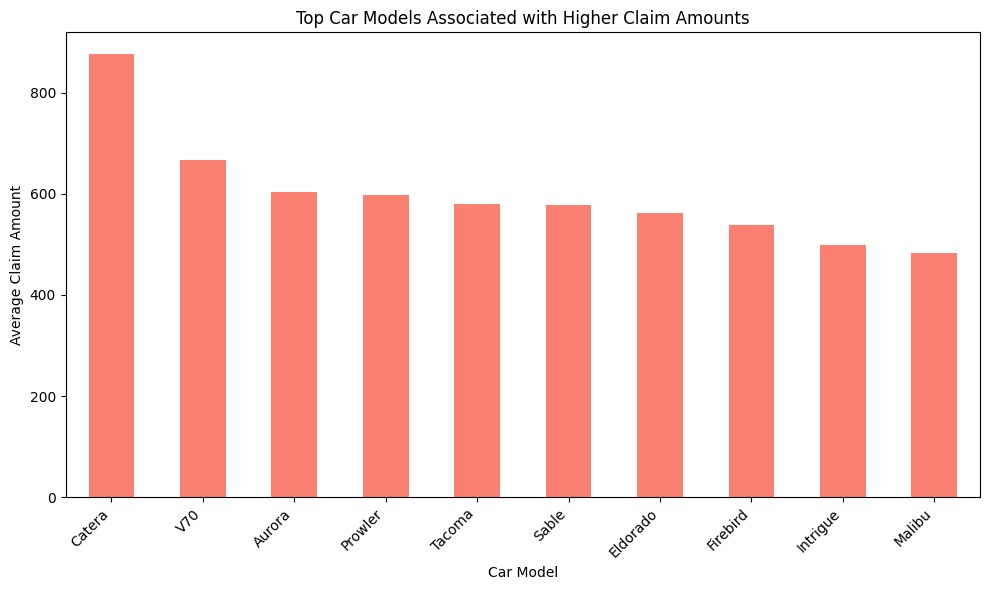

In [193]:
average_claim_per_dealer = insurance_data.groupby('Dealer_Name')['Claim amount'].mean()
average_claim_per_model = insurance_data.groupby('Model')['Claim amount'].mean()

highest_claim_dealers = average_claim_per_dealer.sort_values(ascending=False)
highest_claim_models = average_claim_per_model.sort_values(ascending=False)


print("Top Dealers Associated with Higher Claim Amounts:")
print(highest_claim_dealers.head())

print("\nTop Car Models Associated with Higher Claim Amounts:")
print(highest_claim_models.head())

plt.figure(figsize=(10, 6))
highest_claim_dealers.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Dealers Associated with Higher Claim Amounts')
plt.xlabel('Dealer')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
highest_claim_models.head(10).plot(kind='bar', color='salmon')
plt.title('Top Car Models Associated with Higher Claim Amounts')
plt.xlabel('Car Model')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Identifying cities and dealers with low and high risk profiles

Top Cities Associated with Lower Claim Amounts:
City
Riga          254.806427
Jelgava       280.111536
Liepaja       280.161692
Daugavpils    283.351673
Ventspils     290.253217
Name: Claim amount, dtype: float64

Top Dealers Associated with Lower Claim Amounts:
Dealer_Name
Motor Vehicle Branch Office            208.639291
Buddy Storbeck's Diesel Service Inc    226.284109
Enterprise Rent A Car                  244.895161
Nebo Chevrolet                         245.859873
Chrysler of Tri-Cities                 258.790323
Name: Claim amount, dtype: float64

Top Cities Associated with Higher Claim Amounts:
City
Tukums        297.338795
Ventspils     290.253217
Daugavpils    283.351673
Liepaja       280.161692
Jelgava       280.111536
Name: Claim amount, dtype: float64

Top Dealers Associated with Higher Claim Amounts:
Dealer_Name
Pars Auto Sales         379.009585
Classic Chevy           330.356564
Saab-Belle Dodge        300.948387
Suburban Ford           300.052803
Star Enterprises Inc  

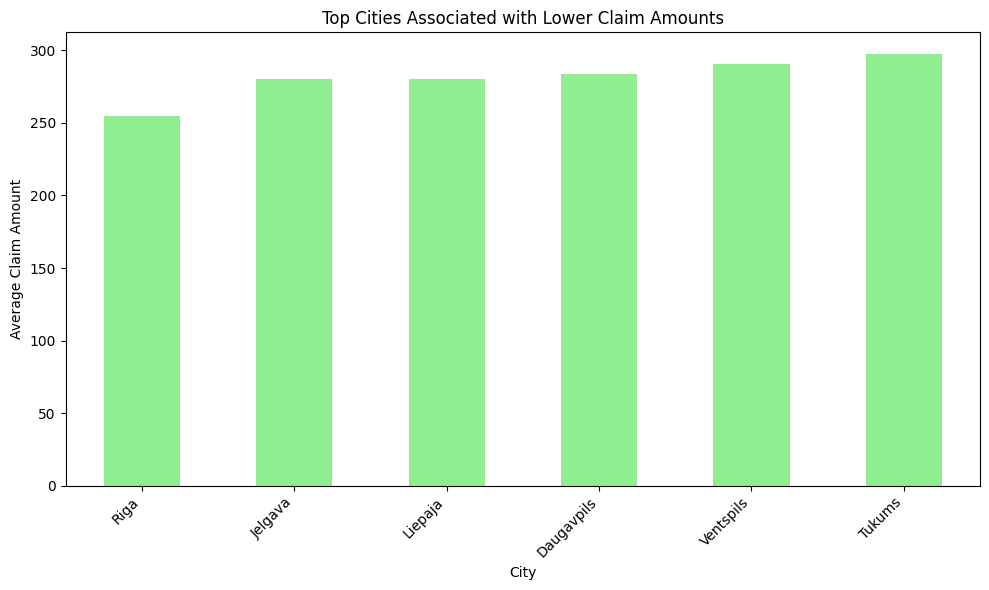

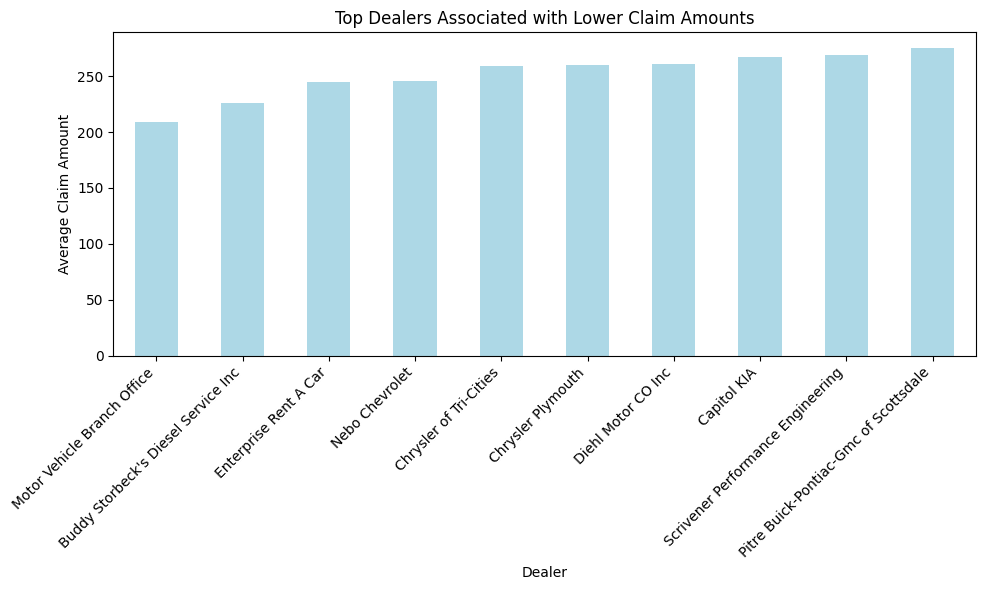

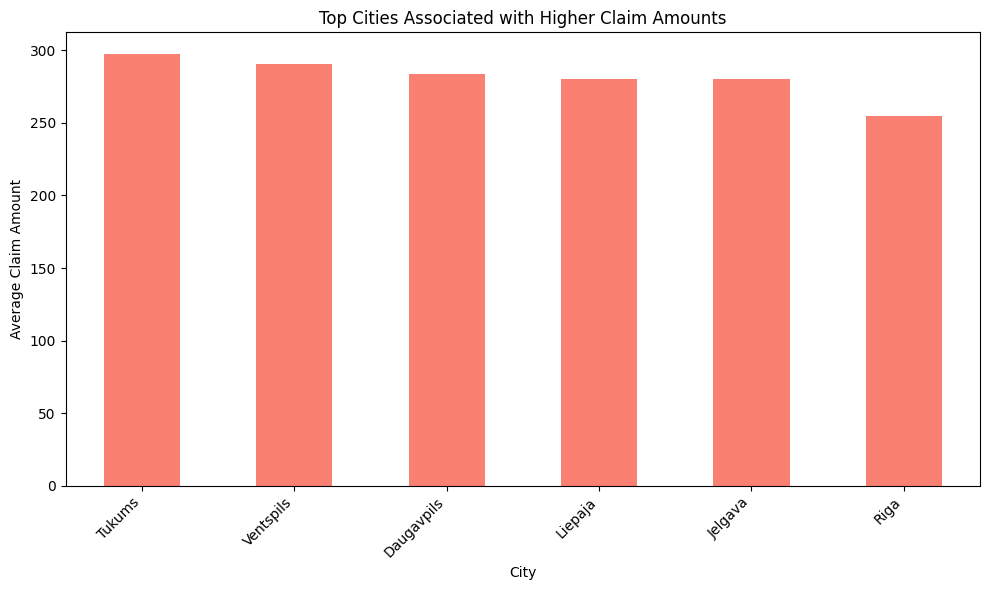

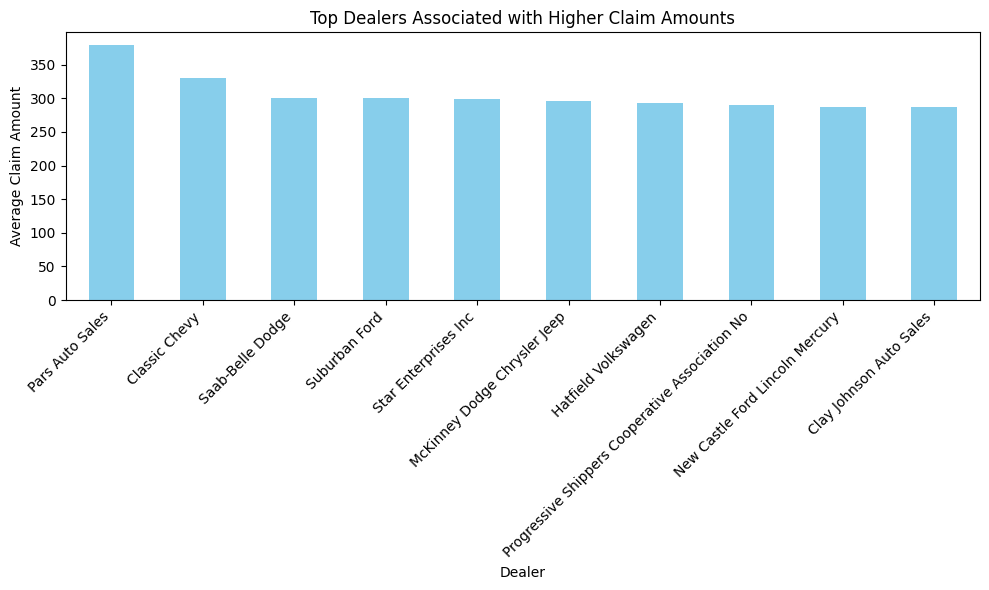

In [202]:
# Calculating average claim amounts per city and dealer
average_claim_per_city = insurance_data.groupby('City')['Claim amount'].mean()
average_claim_per_dealer = insurance_data.groupby('Dealer_Name')['Claim amount'].mean()

# Sorting cities and dealers based on average claim amounts
lowest_claim_cities = average_claim_per_city.sort_values()
lowest_claim_dealers = average_claim_per_dealer.sort_values()

highest_claim_cities = average_claim_per_city.sort_values(ascending=False)
highest_claim_dealers = average_claim_per_dealer.sort_values(ascending=False)

print("Top Cities Associated with Lower Claim Amounts:")
print(lowest_claim_cities.head())

print("\nTop Dealers Associated with Lower Claim Amounts:")
print(lowest_claim_dealers.head())

print("\nTop Cities Associated with Higher Claim Amounts:")
print(highest_claim_cities.head())

print("\nTop Dealers Associated with Higher Claim Amounts:")
print(highest_claim_dealers.head())

plt.figure(figsize=(10, 6))
lowest_claim_cities.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top Cities Associated with Lower Claim Amounts')
plt.xlabel('City')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
lowest_claim_dealers.head(10).plot(kind='bar', color='lightblue')
plt.title('Top Dealers Associated with Lower Claim Amounts')
plt.xlabel('Dealer')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
highest_claim_cities.head(10).plot(kind='bar', color='salmon')
plt.title('Top Cities Associated with Higher Claim Amounts')
plt.xlabel('City')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
highest_claim_dealers.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Dealers Associated with Higher Claim Amounts')
plt.xlabel('Dealer')
plt.ylabel('Average Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Predicting Claim Amount based on car model,transmission,body style,engine

In [194]:
train_size = int(0.7 * len(insurance_data))
test_size = len(insurance_data) - train_size

train_data = insurance_data[:train_size]
test_data = insurance_data[train_size:]

X_train = pd.get_dummies(train_data[['Model', 'Body Style', 'Transmission', 'Engine']])
y_train = train_data['Claim amount']

X_test = pd.get_dummies(test_data[['Model', 'Body Style', 'Transmission', 'Engine']])
y_test = test_data['Claim amount']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)




            Actual   Predicted
Date                          
2023-08-15     0.0  501.129556
2023-08-15  2100.0   84.616131
2023-08-15     0.0  577.210264
2023-08-15     0.0  499.511183
2023-08-15     0.0  358.890428
...            ...         ...
2023-12-31  1200.0  491.526441
2023-12-31     0.0  184.516645
2023-12-31     0.0  569.656531
2023-12-31  3100.0  234.297887
2023-12-31     0.0  109.466017

[7109 rows x 2 columns]
Mean Absolute Error: 506.4284625300018
Root Mean Squared Error: 979.6416058573725


#### Assessing Profitability based on customer segments and city

City        Gender
Daugavpils  0         1349.095408
            1         1359.696009
Jelgava     0         1375.673325
            1         1374.972053
Liepaja     0         1365.805956
            1         1409.593976
Riga        0         1386.155836
            1         1393.940629
Tukums      0         1350.479664
            1         1377.140391
Ventspils   0         1377.353288
            1         1357.657419
Name: Profitability, dtype: float64


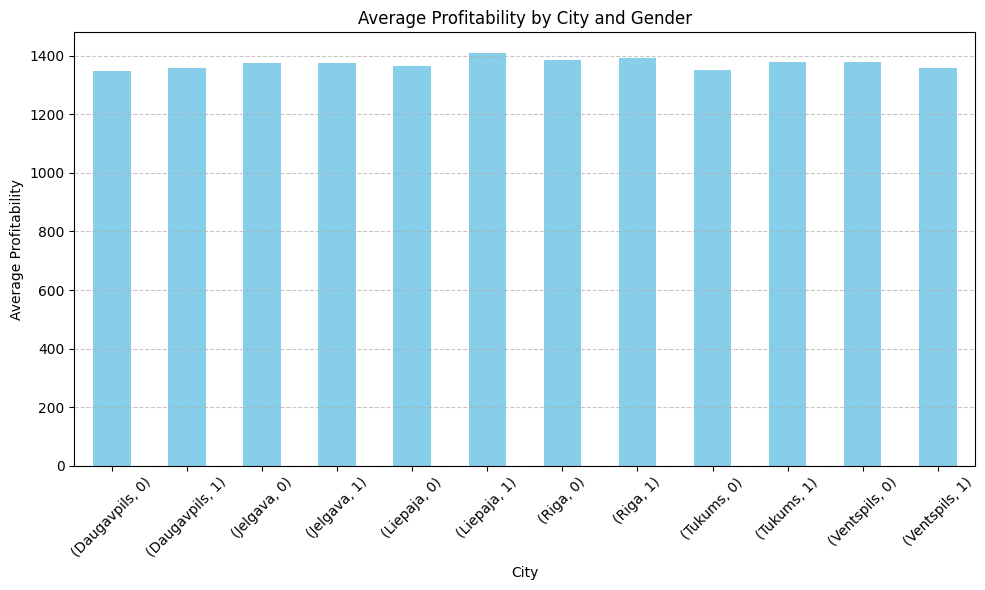

In [195]:
# Calculating profitability
insurance_data['Profitability'] = insurance_data['Amount_paid_for_insurance'] - insurance_data['Claim amount']


# Analyzing profitability across segments
profitability_by_segment = insurance_data.groupby(['City','Gender'])['Profitability'].mean()

print(profitability_by_segment)

plt.figure(figsize=(10, 6))
profitability_by_segment.plot(kind='bar', color='skyblue')
plt.title('Average Profitability by City and Gender')
plt.xlabel('City')
plt.ylabel('Average Profitability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Identifying fraudulent claims

#### Fraud Detection using Random Forest

In [198]:
# Counting  the number of claims per customer
claim_counts = insurance_data.groupby('Customer Name').size().reset_index(name='Claim_Count')
insurance_data = insurance_data.merge(claim_counts, on='Customer Name')

# Calculating the ratio of claim amount to amount paid for insurance
insurance_data['Claim_Ratio'] = insurance_data['Claim amount'] / insurance_data['Amount_paid_for_insurance']

insurance_data.head()

features = insurance_data[['Annual Income', 'Amount_paid_for_insurance', 'Claim amount', 'Claim_Count', 'Claim_Ratio', 'Gender']]
target = insurance_data['Claim Made']  


# train-test split sizes
train_size = int(0.7 * len(insurance_data))
test_size = len(insurance_data) - train_size

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=train_size, test_size=test_size, random_state=42)

# Featuring scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Computing class weights to handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(target), y=target)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Training Random Forest model with class weights
model = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Fraud Detection using Isolation Forest Model

In [201]:
# Selecting relevant features, excluding 'Customer Name'
features = ['Gender', 'Annual Income', 'Amount_paid_for_insurance', 'Claim amount', 'Claim Made']
X = insurance_data[features].copy()  # Create a copy of the DataFrame

# Converting 'Claim Made' column to binary (0 for False, 1 for True)
X['Claim Made'] = X['Claim Made'].astype(int)

# Training Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(X)

# Predicting anomaly scores for all data points
anomaly_scores = model.decision_function(X)

# Identifying potential fraudulent claims based on anomaly scores
potential_fraud = X.loc[anomaly_scores < -0.5]  

print("Potential fraudulent claims:")
print(potential_fraud)


Potential fraudulent claims:
Empty DataFrame
Columns: [Gender, Annual Income, Amount_paid_for_insurance, Claim amount, Claim Made]
Index: []
